# Physics 391
Patrick Selep

Laboratory 1

## CCD Performance Characteristics

This laboratory covered assessing several performance characteristics of the CCD.
Specifically, the Gain, Read Noise, Dark Current and Linearity were measured.

### Experimental Apparatus

The SBIG STT 8300 was tested on a bench through a camera lens.
A white board was mounted to the ceiling above the camera.
The board illuminated with a halogen lamp with a dimmer control.
Linearity was tested at varying exposure times up to saturation.
Intensity was also varied as was the lighting arrangement.
Bias and dark images were taken with the lense cap on.
Bias images were taken with an exposure time of zero.
Dark images were taken with varying exposure times up to 16 minutes.

Here is a picture of the arrangement of the equipment.

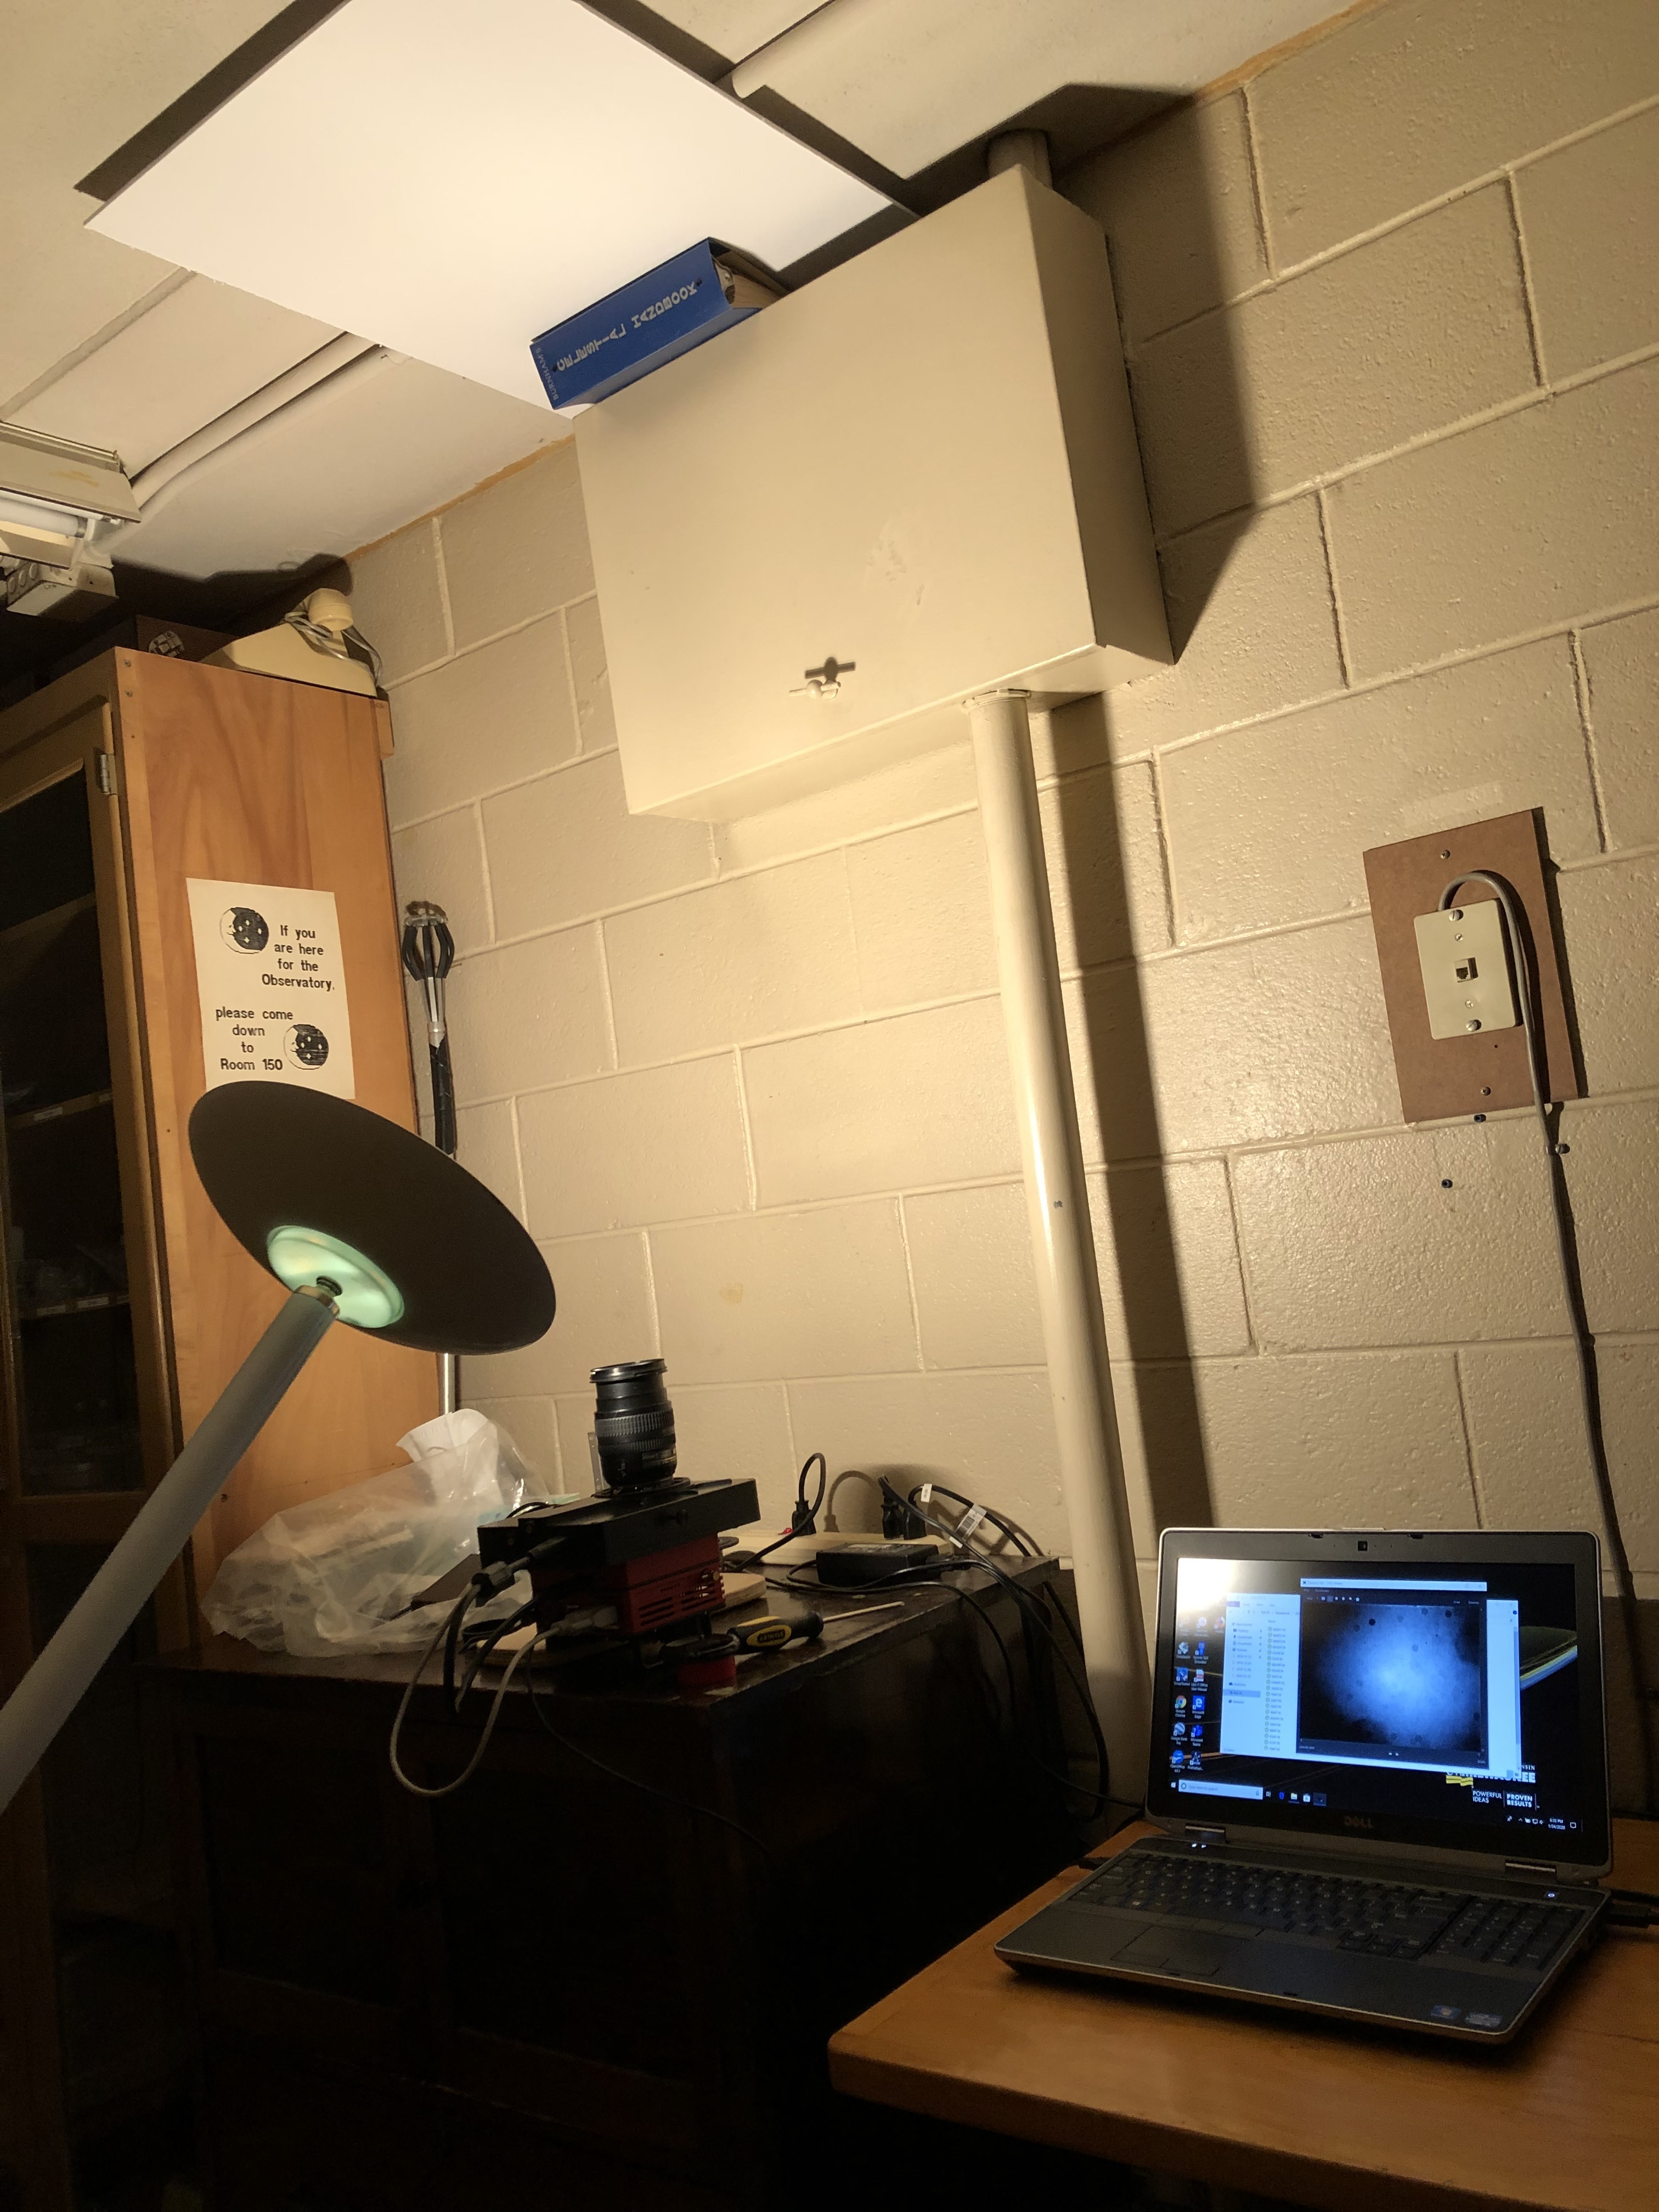


## Performance Characteristics

$\text{Gain and Read Noise were calculated from a pair of matched flat and bias images.}$
$\text{The formulas used to determine them are shown below:}$

$$\text{Gain} = \frac{(\bar{F_1} + \bar{F_2}) - (\bar{B_1} + \bar{B_2})}
                {\sigma_{F_1 - F_2}^2 - \sigma_{B_1 - B_2}^2}$$


$$\text{Read Noise} = \frac{\text{Gain}\cdot \sigma_{B_1-B_2}}{\sqrt{2}}$$

$\text{The results were as follows:}$

$\text{The Gain was found to be 0.379 e-/ADU compared to the published 0.37 e-/adu.}$

$\text{The Read Noise was found to be 10.663 e- rms compared to the published <10 e- rms.}$


$\text{The Dark Current was found to be 0.328 e-/pixel/sec at -1 C compared to 0.02 e-/pixel/sec at -15 C.}$

Dark Current is highly dependent on temperature. From the Handbook of CCD Astronomy "Typical values for properly cooled devices range from 2 electrons per second per pixel down to very low levels of approximately 0.04 electrons per second for each pixel."

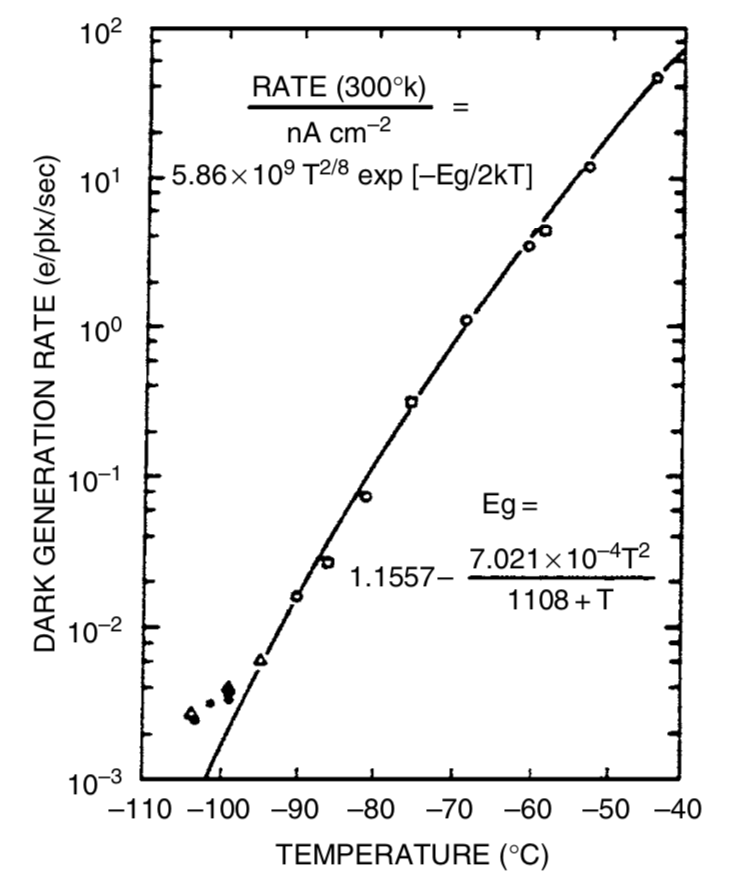

$\text{The Linearity was found to be linear with and R = .999974 up to saturation.}$

$\text{The residuals of this plot show that counts are below predictions at high counts.}$



## Manufacturer's Specifications

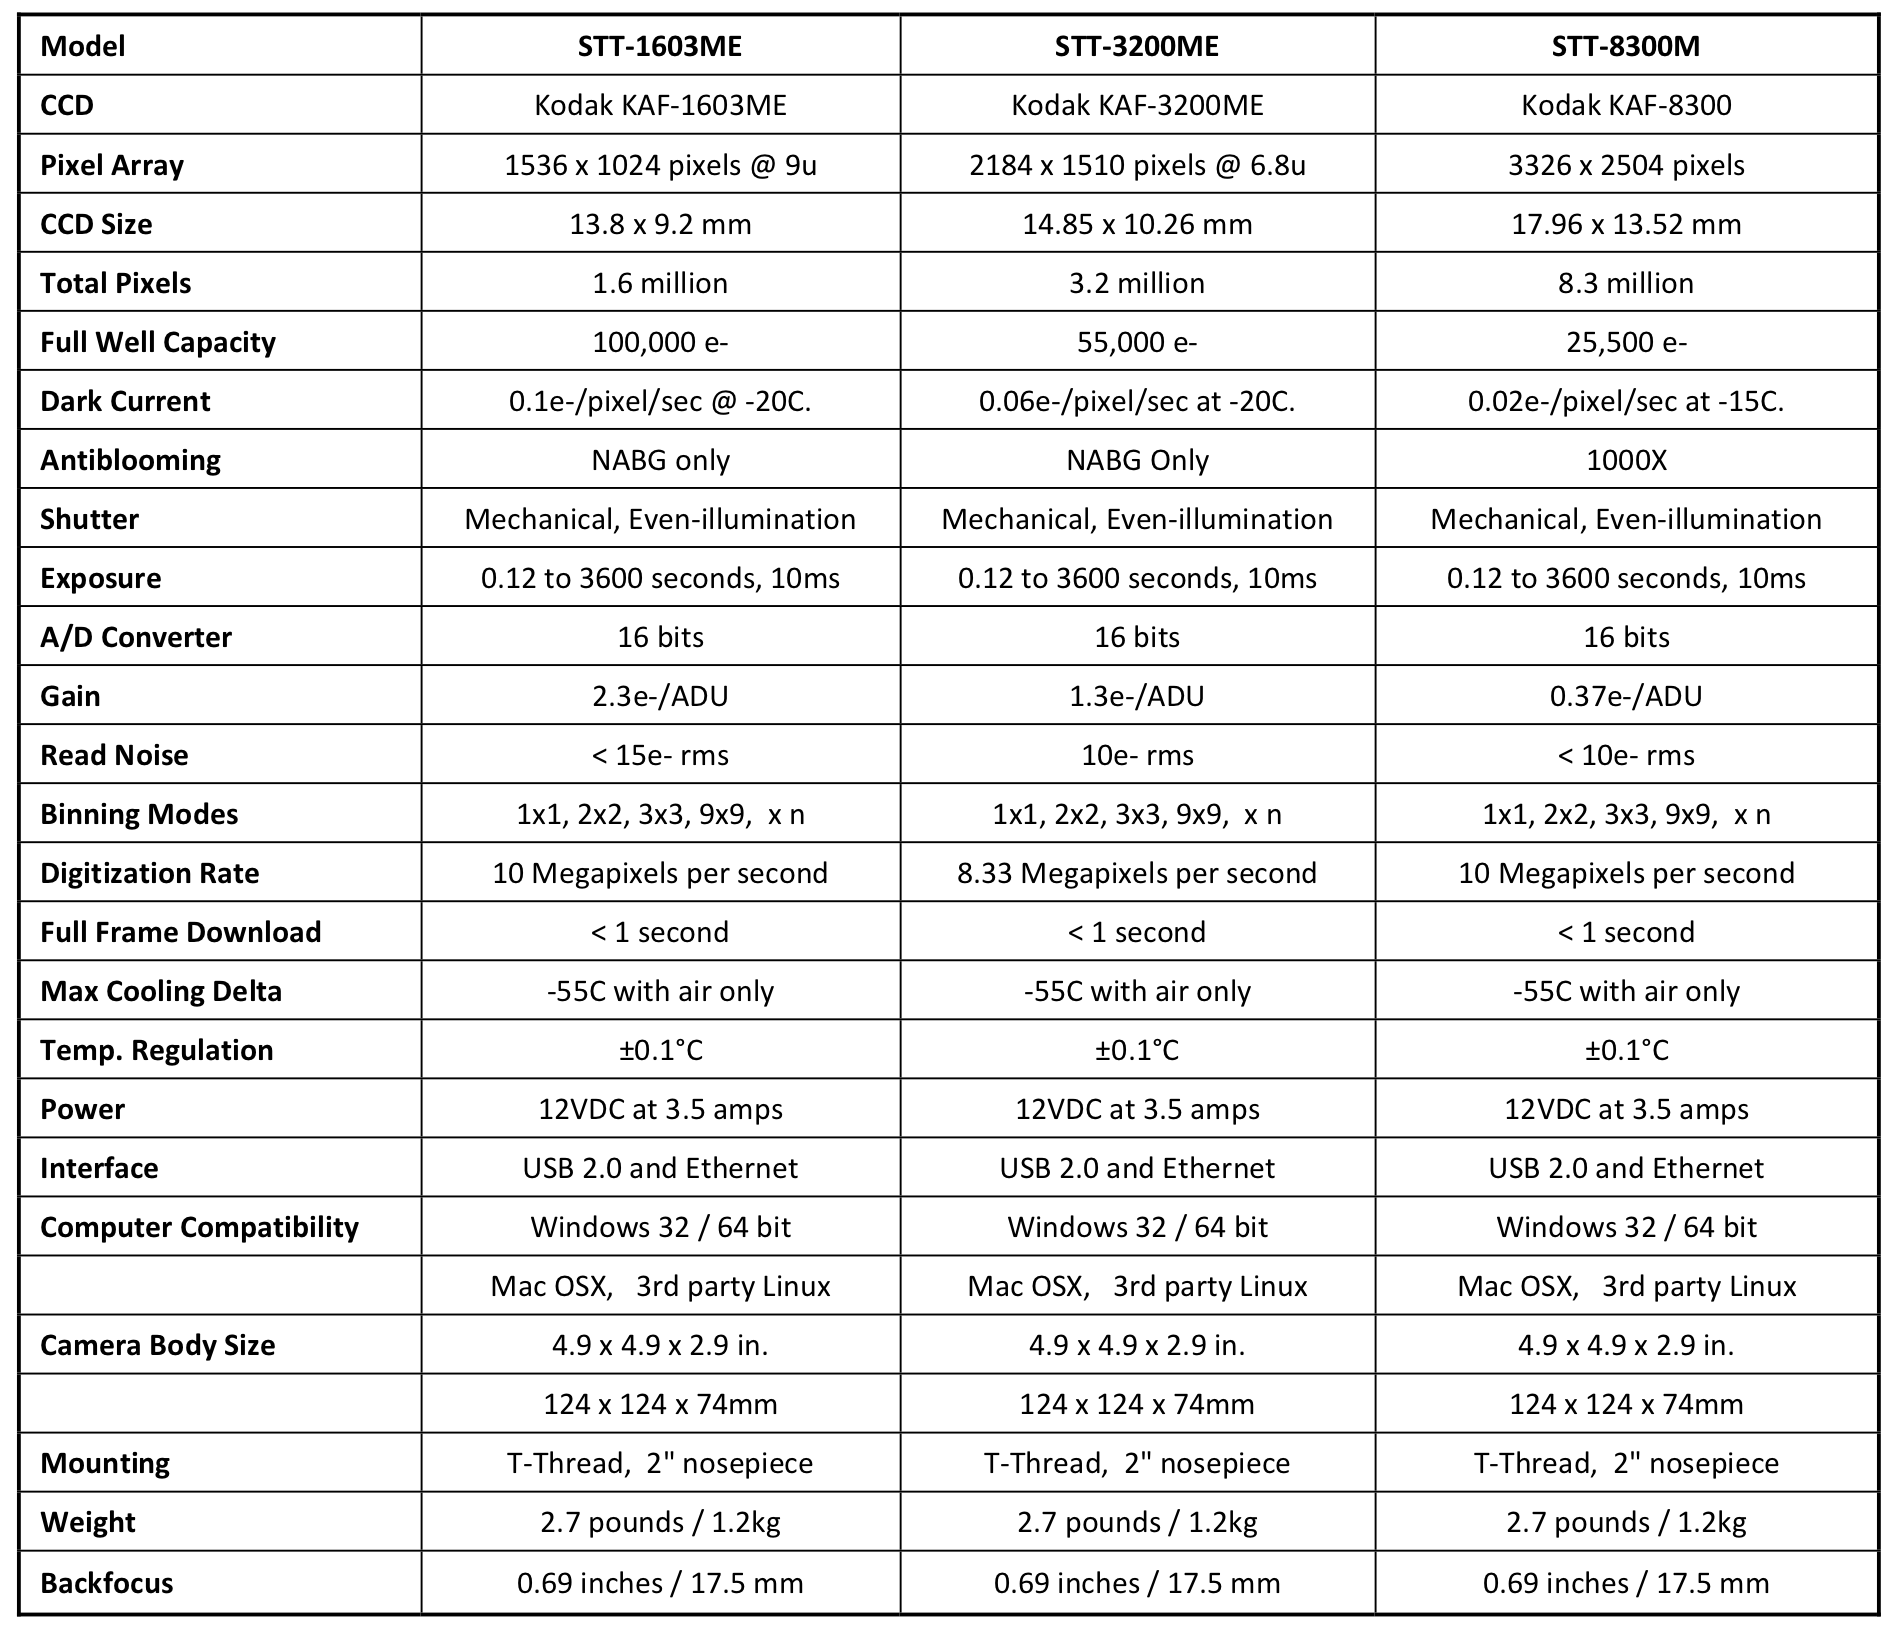

In [101]:
from astropy.io import fits
from os import walk
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats


In [110]:
#with fits.open('2020-01-23/65sFF.fit') as f:
#    f.info()
#    scidata = f[0].data.copy()

In [103]:
#print(scidata.shape)
#print(scidata.dtype)

In [104]:
#f[0].header  

In [105]:
#f[0].header['EXPTIME']

In [108]:
# Find GAIN

# Get the data from an HDU.
F1data = fits.getdata('2020-01-23/Gain/2sFF1.fit').astype(float)
#print(f"min: {F1data.min()}, max: {F1data.max()}, mean: {F1data.mean():.3f}, std: {F1data.std():.3f}, Flat1")
Flat1Mean = F1data.mean()
Flat1Std = F1data.std()
F2data = fits.getdata('2020-01-23/Gain/2sFF2.fit').astype(float)
#print("min: {}, max: {}, mean: {:.3f}, std: {:.3f}, Flat2".format(F2data.min(), F2data.max(), F2data.mean(), F2data.std()))
Flat2Mean = F2data.mean()
Flat2Std = F2data.std()
Z1data = fits.getdata('2020-01-23/Gain/00sBS1.fit').astype(float)
#print("min: {}, max: {}, mean: {:.3f}, std: {:.3f}, Dark1".format(Z1data.min(), Z1data.max(), Z1data.mean(), Z1data.std()))
Zero1Mean = Z1data.mean()
Zero1Std = Z1data.std()
Z2data = fits.getdata('2020-01-23/Gain/00sBS2.fit').astype(float)
#print("min: {}, max: {}, mean: {:.3f}, std: {:.3f}, Dark2".format(Z2data.min(), Z2data.max(), Z2data.mean(), Z2data.std()))
Zero2Mean = Z2data.mean()
Zero2Std = Z2data.std()

flatdif = (F1data - F2data)

flatstd = flatdif.std()
#print("flatstd: {:.3f}".format(flatstd))
zerodif = Z1data - Z2data
zerostd = zerodif.std()
#print("zerostd: {:.3f}".format(zerostd))
gain = ((Flat1Mean + Flat2Mean) - (Zero1Mean + Zero2Mean)) / ((flatstd)**2 - (zerostd)**2 )


readnoise = gain * zerostd / np.sqrt(2)
print("gain: {:.3f}, readnoise: {:.3f}".format(gain, readnoise))


gain: 0.379, readnoise: 10.663


## Dark Current

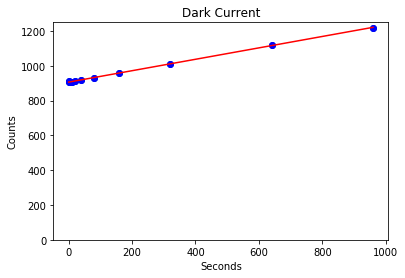

slope: 0.328064, R: 0.999794, P: 0.000000, Std_err: 0.002221
Dark Current: 0.328, at Temp: -0.888


In [122]:
# READ Files

from pathlib import Path
Means = []
Expos = []

basepath = Path('2020-02-04/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            Means.append(data.mean())
            Expos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(Expos,Means)
plt.title('Dark Current')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,1250)

#

gradient, intercept, r_value, p_value, std_err = stats.linregress(Expos,Means)
mn=np.min(Expos)
mx=np.max(Expos)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(Expos,Means,'ob')
plt.plot(x1,y1,'-r')
plt.show()

print("slope: {:.6f}, R: {:.6f}, P: {:.6f}, Std_err: {:.6f}".format(gradient,r_value,p_value,std_err))

with fits.open('2020-02-04/640sDK.fit') as f:
    print("Dark Current: {:.3f}, at Temp: {:.3f}".format(gradient,f[0].header["CCD-TEMP"]))  


## Linearity


slope: 7934.225589, R: 0.999974, P: 0.000000, Std_err: 13.591658


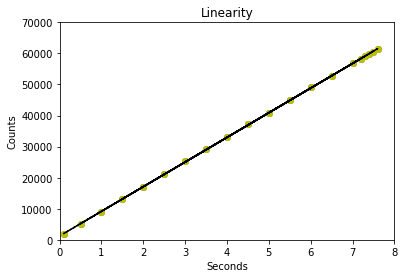

In [141]:
# READ Files

from pathlib import Path
Means = []
Expos = []

basepath = Path('2020-01-23/Fast/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            Means.append(data.mean())
            Expos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(Expos,Means)
plt.title('Linearity')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,70000)

#
gradient, intercept, r_value, p_value, std_err = stats.linregress(Expos,Means)
mn=np.min(Expos)
mx=np.max(Expos)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

#
coef = np.polyfit(Expos,Means,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(Expos,Means, 'yo', Expos, poly1d_fn(Expos), '--k')
#plt.plot(x1,y1+1000,'-r')


plt.xlim(0, 8)
plt.ylim(0, 70000)
plt.show

print("slope: {:.6f}, R: {:.6f}, P: {:.6f}, Std_err: {:.6f}".format(gradient,r_value,p_value,std_err))



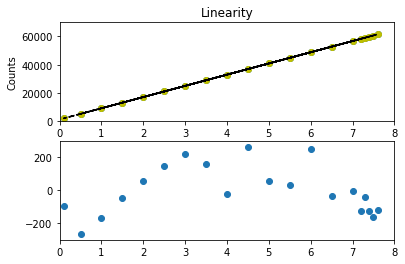

In [142]:

#PLOT

plt.subplot(211)
plt.scatter(Expos,Means)
plt.title('Linearity')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,70000)

coef = np.polyfit(Expos,Means,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(Expos,Means, 'yo', Expos, poly1d_fn(Expos), '--k')
plt.xlim(0, 8)
plt.ylim(0, 70000)
plt.show


#Residual plot

plt.subplot(212)
plt.scatter(Expos,Means-poly1d_fn(Expos))
#plt.scatter(x1,Means-y1)


plt.xlim(0, 8)
plt.ylim(-300, 300)
plt.show()



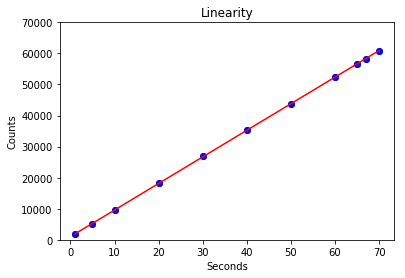

slope: 855.9002635086536, R: 0.9999802673596974, P: 3.942172701229881e-21, Std_err: 1.7923215654218903


In [64]:
# READ Files

from pathlib import Path
Means = []
Expos = []

basepath = Path('2020-01-23/Slow/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            Means.append(data.mean())
            Expos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(Expos,Means)
plt.title('Linearity')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,70000)

#


gradient, intercept, r_value, p_value, std_err = stats.linregress(Expos,Means)
mn=np.min(Expos)
mx=np.max(Expos)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(Expos,Means,'ob')
plt.plot(x1,y1,'-r')
plt.show()

print("slope: {}, R: {}, P: {}, Std_err: {}".format(gradient,r_value,p_value,std_err))
#

<function matplotlib.pyplot.show(*args, **kw)>

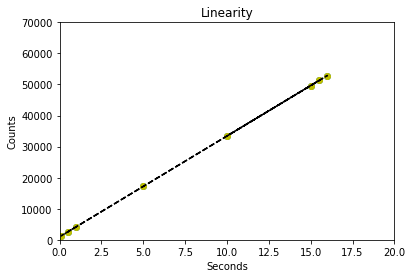

In [55]:
# READ Files

from pathlib import Path
Means = []
Expos = []

basepath = Path('2020-01-23/Med/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            Means.append(data.mean())
            Expos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(Expos,Means)
plt.title('Linearity')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,70000)

#
coef = np.polyfit(Expos,Means,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(Expos,Means, 'yo', Expos, poly1d_fn(Expos), '--k')
plt.xlim(0, 20)
plt.ylim(0, 70000)

#

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

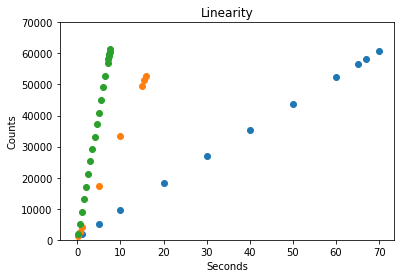

In [53]:
# READ Slow Files

from pathlib import Path
SMeans = []
SExpos = []

basepath = Path('2020-01-23/Slow/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            SMeans.append(data.mean())
            SExpos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(SExpos,SMeans)
plt.title('Linearity')
plt.xlabel('Seconds')
plt.ylabel('Counts')
plt.ylim(0,70000)



# READ Med Files

#from pathlib import Path
MMeans = []
MExpos = []

basepath = Path('2020-01-23/Med/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            MMeans.append(data.mean())
            MExpos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(MExpos,MMeans)
#plt.title('Linearity')
#plt.xlabel('Seconds')
#plt.ylabel('Counts')
#plt.ylim(0,70000)

# READ Fast Files

#from pathlib import Path
FMeans = []
FExpos = []

basepath = Path('2020-01-23/Fast/')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        with fits.open(item) as f:
#            f.info()
#        print(item.name, (f[0].header['EXPTIME']))
            data = fits.getdata(basepath/item.name)
            FMeans.append(data.mean())
            FExpos.append(f[0].header['EXPTIME'])
#            print("mean: {}, exp: {}".format(data.mean(), (f[0].header['EXPTIME'])))
#            plt.scatter((f[0].header['EXPTIME']),data.mean())

plt.scatter(FExpos,FMeans)
#plt.title('Linearity')
#plt.xlabel('Seconds')
#plt.ylabel('Counts')
#plt.ylim(0,70000)

plt.show
